In [10]:
# only for cuda enabled laptop and desktop
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL #pillow to handle images
import tensorflow as tf

In [24]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" #tgz = tar ball (just like zip file)
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)#like unzip
data_dir = pathlib.Path(data_dir)
data_dir


WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos')

In [25]:
data_dir

WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos')

In [27]:
os.listdir('C:/Users/sahar/.keras/datasets/flower_photos')

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [30]:
os.listdir('C:/Users/sahar/.keras/datasets/flower_photos/tulips')

['100930342_92e8746431_n.jpg',
 '10094729603_eeca3f2cb6.jpg',
 '10094731133_94a942463c.jpg',
 '10128546863_8de70c610d.jpg',
 '10163955604_ae0b830975_n.jpg',
 '10164073235_f29931d91e.jpg',
 '10686568196_b1915544a8.jpg',
 '107693873_86021ac4ea_n.jpg',
 '10791227_7168491604.jpg',
 '10995953955_089572caf0.jpg',
 '110147301_ad921e2828.jpg',
 '112334842_3ecf7585dd.jpg',
 '112428665_d8f3632f36_n.jpg',
 '112428919_f0c5ad7d9d_n.jpg',
 '112650879_82adc2cc04_n.jpg',
 '112651128_7b5d39a346_m.jpg',
 '112951022_4892b1348b_n.jpg',
 '112951086_150a59d499_n.jpg',
 '113291410_1bdc718ed8_n.jpg',
 '113902743_8f537f769b_n.jpg',
 '113960470_38fab8f2fb_m.jpg',
 '11441893003_ab83672800.jpg',
 '11614202956_1dcf1c96a1.jpg',
 '116343334_9cb4acdc57_n.jpg',
 '11746080_963537acdc.jpg',
 '11746276_de3dec8201.jpg',
 '11746367_d23a35b085_n.jpg',
 '11746452_5bc1749a36.jpg',
 '11746548_26b3256922_n.jpg',
 '12024561754_ce9667e4dc_n.jpg',
 '12025038686_7f10811d4b_n.jpg',
 '12025042086_78bafc0eb6_n.jpg',
 '12163418275_bd6a

In [31]:
len(os.listdir('C:/Users/sahar/.keras/datasets/flower_photos/tulips'))

799

In [32]:
len(os.listdir('C:/Users/sahar/.keras/datasets/flower_photos/roses'))

641

In [34]:
len(os.listdir('C:/Users/sahar/.keras/datasets/flower_photos/sunflowers'))

699

In [35]:
len(os.listdir('C:/Users/sahar/.keras/datasets/flower_photos/daisy'))

633

In [36]:
len(os.listdir('C:/Users/sahar/.keras/datasets/flower_photos/dandelion'))

898

In [37]:
os.listdir('C:/Users/sahar/.keras/datasets/flower_photos/dandelion')

['10043234166_e6dd915111_n.jpg',
 '10200780773_c6051a7d71_n.jpg',
 '10294487385_92a0676c7d_m.jpg',
 '10437652486_aa86c14985.jpg',
 '10443973_aeb97513fc_m.jpg',
 '10477378514_9ffbcec4cf_m.jpg',
 '10486992895_20b344ce2d_n.jpg',
 '10617162044_8740d4dd9f_n.jpg',
 '10617191174_9a01753241_n.jpg',
 '10683189_bd6e371b97.jpg',
 '1074999133_1e4a1e042e.jpg',
 '10777398353_5a20bb218c.jpg',
 '10778387133_9141024b10.jpg',
 '10779476016_9130714dc0.jpg',
 '1080179756_5f05350a59.jpg',
 '10828951106_c3cd47983f.jpg',
 '10919961_0af657c4e8.jpg',
 '10946896405_81d2d50941_m.jpg',
 '11124381625_24b17662bd_n.jpg',
 '1128626197_3f52424215_n.jpg',
 '11296320473_1d9261ddcb.jpg',
 '11405573_24a8a838cc_n.jpg',
 '11465213433_847c4fa261.jpg',
 '11545123_50a340b473_m.jpg',
 '11595255065_d9550012fc.jpg',
 '11768468623_9399b5111b_n.jpg',
 '11775820493_10fedf4bff_n.jpg',
 '1193386857_3ae53574f2_m.jpg',
 '1195255751_d58b3d3076.jpg',
 '12094442595_297494dba4_m.jpg',
 '1241011700_261ae180ca.jpg',
 '126012913_edf771c564_n.j

In [38]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from glob import glob   #to handle folder/Directory

In [39]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [40]:
roses_count = len(list(data_dir.glob('roses/*.jpg')))
print(roses_count)

641


In [41]:
roses = list(data_dir.glob('roses/*.jpg'))

In [42]:
roses

[WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('C:/Users/sahar/.keras/data

In [43]:
roses[0]

WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

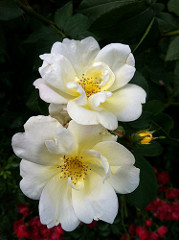

In [44]:
PIL.Image.open(str(roses[0]))

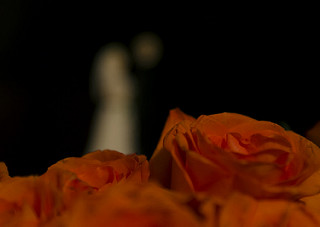

In [45]:
PIL.Image.open(str(roses[45]))

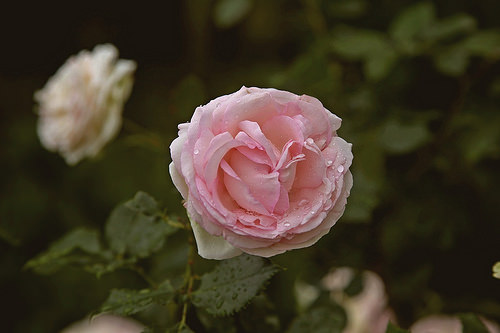

In [46]:
PIL.Image.open(str(roses[100]))

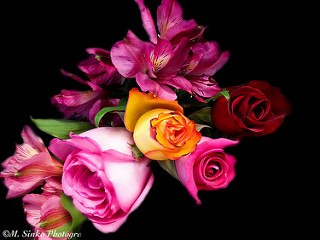

In [50]:
rose1 = image.load_img('C:/Users/sahar/.keras/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg')
rose1

In [52]:
tulips = list(data_dir.glob('tulips/*.jpg'))
tulips

[WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/tulips/10164073235_f29931d91e.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/tulips/10686568196_b1915544a8.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/tulips/107693873_86021ac4ea_n.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/tulips/10791227_7168491604.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datasets/flower_photos/tulips/10995953955_089572caf0.jpg'),
 WindowsPath('C:/Users/sahar/.keras/datas

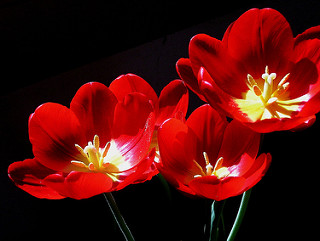

In [54]:
PIL.Image.open(str(tulips[55]))

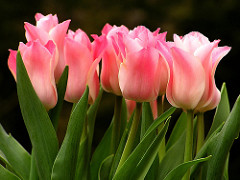

In [56]:
test_tulips = image.load_img('C:/Users/sahar/.keras/datasets/flower_photos/tulips/112651128_7b5d39a346_m.jpg')
test_tulips

In [58]:
batch_size = 64
epochs = 50
IMG_HIEGHT = 224
IMG_WIDHT = 224

In [59]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5,
                                    validation_split=0.2)

In [64]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                    subset='training')

Found 2939 images belonging to 5 classes.


In [65]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [66]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=data_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation')

Found 731 images belonging to 5 classes.


In [67]:
sample_images,labels = next(train_data_gen)

In [68]:
sample_images.shape

(64, 224, 224, 3)

In [69]:
labels

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1.

In [70]:
train_data_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [71]:
from keras.layers import Conv2D,MaxPooling2D,Dropout
model = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(5,activation='softmax')
])

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)       

In [80]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [81]:
history = model.fit(train_data_gen,validation_data=val_data_gen,epochs=epochs,verbose=1)


Epoch 1/50
46/46 [==============================] - 25s 536ms/step - loss: 1.5706 - accuracy: 0.3372 - val_loss: 1.2558 - val_accuracy: 0.5034
Epoch 2/50
46/46 [==============================] - 23s 492ms/step - loss: 1.1561 - accuracy: 0.5206 - val_loss: 1.1261 - val_accuracy: 0.5390
Epoch 3/50
46/46 [==============================] - 22s 479ms/step - loss: 1.0681 - accuracy: 0.5669 - val_loss: 1.0815 - val_accuracy: 0.5622
Epoch 4/50
46/46 [==============================] - 23s 501ms/step - loss: 1.0094 - accuracy: 0.5890 - val_loss: 1.0217 - val_accuracy: 0.5759
Epoch 5/50
46/46 [==============================] - 26s 557ms/step - loss: 0.9415 - accuracy: 0.6339 - val_loss: 0.9754 - val_accuracy: 0.6115
Epoch 6/50
46/46 [==============================] - 23s 489ms/step - loss: 0.8937 - accuracy: 0.6529 - val_loss: 0.9372 - val_accuracy: 0.6293
Epoch 7/50
46/46 [==============================] - 22s 480ms/step - loss: 0.8865 - accuracy: 0.6526 - val_loss: 0.9131 - val_accuracy: 0.6416

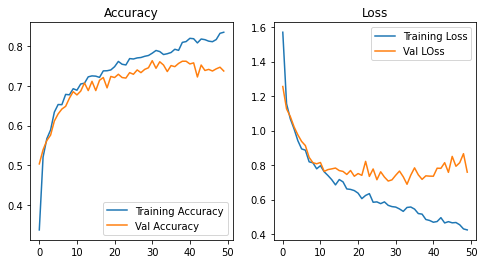

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [83]:
tf.keras.models.save_model(model,'flowermodel.h5')

In [90]:
image_1 = load_img('C:/Users/sahar/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg',target_size=(IMG_HIEGHT,IMG_WIDHT))

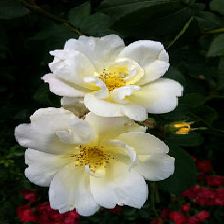

In [91]:
image_1

In [92]:
test_img = img_to_array(image_1)

In [93]:
test_img

array([[[ 6., 15.,  0.],
        [ 6., 15.,  0.],
        [ 6., 15.,  0.],
        ...,
        [32., 52., 25.],
        [32., 52., 25.],
        [33., 53., 26.]],

       [[14., 22.,  7.],
        [14., 22.,  7.],
        [14., 22.,  7.],
        ...,
        [33., 49., 23.],
        [33., 49., 23.],
        [35., 51., 25.]],

       [[15., 23., 12.],
        [15., 23., 12.],
        [15., 23., 12.],
        ...,
        [33., 45., 23.],
        [33., 45., 23.],
        [36., 48., 26.]],

       ...,

       [[27., 30., 19.],
        [18., 24., 14.],
        [18., 24., 14.],
        ...,
        [ 1.,  8.,  0.],
        [ 1.,  8.,  0.],
        [ 0.,  5.,  0.]],

       [[28., 30., 19.],
        [24., 27., 18.],
        [24., 27., 18.],
        ...,
        [ 2.,  9.,  1.],
        [ 2.,  9.,  1.],
        [ 2.,  7.,  0.]],

       [[19., 19.,  9.],
        [24., 25., 17.],
        [24., 25., 17.],
        ...,
        [ 3., 10.,  2.],
        [ 3., 10.,  2.],
        [ 4., 11.,  3.]]

In [94]:
test_img.shape

(224, 224, 3)

In [95]:
test_img = test_img.reshape(1,224,224,3)

In [96]:
test_img.shape

(1, 224, 224, 3)

In [97]:
model.predict(test_img)

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [98]:
np.argmax(model.predict(test_img))

0